Nama : Gede Indra Adi Brata

NIM : 225150200111006

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np

Data Preprocessing

In [44]:
df = pd.read_csv('data.csv')

In [45]:
data = df[(df['label'] == 1) | (df['label'] == 2)]
data.reset_index(drop=True, inplace=True)

C:\Users\indra\AppData\Local\Temp\ipykernel_10336\824333427.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  kelas = row[0]  # Kolom pertama adalah nama kelas


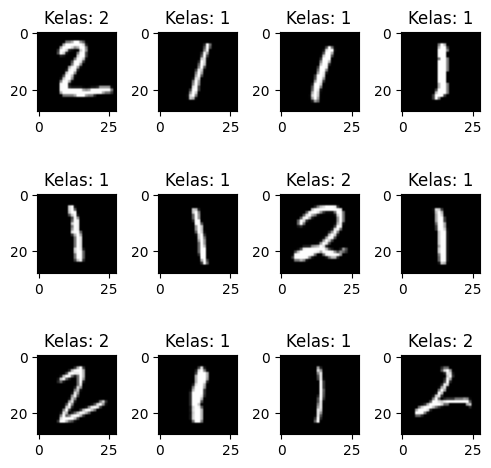

In [46]:
selected = data.iloc[:12]

baris, kolom = 3, 4
fig, axes = plt.subplots(baris, kolom, figsize=(5, 5))

for index, row in selected.iterrows():
    kelas = row[0]  # Kolom pertama adalah nama kelas
    nilai_piksel = row[1:].values.astype(int)  # Kolom 2 dan seterusnya adalah nilai piksel

    ukuran_citra = (int(np.sqrt(len(nilai_piksel))), int(np.sqrt(len(nilai_piksel))))
    citra = nilai_piksel.reshape(ukuran_citra)

    baris_subplot = index // kolom
    kolom_subplot = index % kolom
    axes[baris_subplot, kolom_subplot].imshow(citra, cmap='gray')
    axes[baris_subplot, kolom_subplot].set_title(f'Kelas: {kelas}')

plt.tight_layout()
plt.show()

In [47]:
def elm_fit(X, target, h, W=None):
    start_time = time.time()

    # Inisialisasi bobot acak jika tidak disediakan
    if W is None:
        W = np.random.uniform(-1, 1, (X.shape[1], h))

    # Hitung keluaran hidden layer
    Hinit = np.dot(X, W)
    H = 1 / (1 + np.exp(-Hinit))

    # Ubah urutan keluaran hidden layer
    Ht = H.T

    # Pseudo-invers dari keluaran transposed hidden layer
    H_plus = np.linalg.pinv(H)

    # Konversi target ke one-hot encoding
    Y = pd.get_dummies(target).values

    # Hitung bobot keluaran
    beta = np.dot(H_plus, Y)

    # Hitung prediksi keluaran
    y = np.dot(H, beta)

    # Hitung Mean Squared Error
    mse = np.mean((Y - y)**2)

    # Hitung waktu eksekusi
    execution = time.time() - start_time
    print("Waktu eksekusi: %s detik" % execution)

    # Mengembalikan bobot, bobot keluaran, dan MSE
    return W, beta, mse

In [48]:
def elm_predict(X, W, b, round_output=False):
    # Hitung keluaran layer output
    Hinit = np.dot(X, W)
    H = 1 / (1 + np.exp(-Hinit))

    # Hitung prediksi keluaran
    y = np.dot(H, b)

    # Secara opsional membulatkan nilai keluaran
    if round_output:
        y = np.argmax(y, axis=1) + 1

    # Mengembalikan hasil prediksi
    return y

In [49]:
# Persiapan data
X = minmax_scale(data.drop('label', axis=1).astype('float32'))
Y = data['label'].astype('int')

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Latih model ELM
h = 100  # Jumlah hidden neuron
W, b, mse = elm_fit(X_train, y_train, h)
print('MSE:', mse)

# Buat prediksi pada set tes
output = elm_predict(X_test, W, b, round_output=True)

# Hitung dan cetak akurasi
accuracy = accuracy_score(output, y_test)
print('Output:', output)
print('True   :', y_test)
print('Accuracy:', accuracy)

Waktu eksekusi: 0.0843496322631836 detik
MSE: 0.025594529542358652
Output: [2 2 1 1 1 2 1 1 2 2 1 1 2 1 2 2 2 2 1 1 1 2 2 1 2 1 2 2 1 1 1 2 2 1 1 1 1
 1 1 1 1 1 2 2 1 2 2 1 2 2 1 2 2 2 2 2 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1
 2 1 2 1 1 2 1 1 1 2 1 1 1 2 1 1 2 2 1 2 2 2 1 2 1 1 2 1 1 1 2 2 1 1 2 2 2
 2 2 2 2 1 1 2 1 1 2 2 2 1 2 2 1 1 1 1 2 2 1 1 2 1 1 1 2 1 1 1 2 1 2 2 2 2
 2 1 1 2 2 1 2 2 1 2 1 1 2 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 2 2 2 2 2 2 2 1 2
 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1 1 1 2 2 1 1 1 2 2 1 1 1 2 1 1
 2 2 2 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 2 2 1 1 1 1 2 2 1 2 1 1 1 1 1 1
 1 1 2 1 1 2 2 1 1 2 2 1 2 1 2 1 2 2 1 2 2 2 1 2 1 1 2 1 1 2 1 2 2 1 2 1 1
 1 1 1 1 2 2 2 1 2 2 1 1 1 1 1 2 2 1 2 2 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 1 1
 2 1 2 2 2 1 2 1 2 2 1 1 1 2 1 1 2 1 2 2 2 2 1 1 2 2 2 2 1 1 2 1 1 2 2 2 2
 1 2 1 2 2 1 1 1 2 2 2 1 1 1 2 2 2 2 2 2 1 2 1 2 2 1 1 2 1 1 1 2 1 2 1 1 1
 1 2 2 2 2 1 2 1 2 1 1 2 2 2 1 1 2 2 2 1 2 2 1 1 1 1 1]
True   : 1486    2
1602    2
1460    1
1134 

1. Jelaskan mengapa disebut Extreme Learning Machine?

- Pelatihan Super Cepat

Extreme Learning Machine (ELM) dikenal karena proses pelatihannya yang sangat cepat. Metode ini menggunakan jaringan saraf feedforward dengan lapisan tersembunyi yang bobotnya diinisialisasi secara acak dan tidak diperbarui selama pelatihan. Bobot keluaran dihitung menggunakan solusi analitik, seperti pseudoinverse, sehingga tidak memerlukan iterasi yang kompleks seperti metode backpropagation pada jaringan saraf tradisional.

- Tidak Memerlukan Penyesuaian Parameter yang Rumit

ELM tidak membutuhkan penyesuaian parameter yang rumit. Parameter seperti bobot dan bias pada lapisan tersembunyi ditentukan secara acak dan tetap selama pelatihan. Hal ini mengurangi kebutuhan untuk melakukan tuning hyperparameter yang sering menjadi tantangan utama dalam metode pembelajaran mesin lainnya.

- Kemampuan Generalisasi yang Tinggi

Meskipun lapisan tersembunyinya tidak dilatih, ELM mampu menunjukkan kemampuan generalisasi yang tinggi pada banyak kasus. Bahkan, performanya sering kali setara atau lebih baik daripada metode lain seperti Support Vector Machines (SVM), membuktikan keefektifan pendekatannya.

- Menyederhanakan Struktur Jaringan

ELM menggunakan struktur jaringan yang lebih sederhana dibandingkan jaringan saraf tradisional. Proses pelatihan hanya melibatkan penyelesaian sistem persamaan linier, sehingga menghindari optimisasi non-linear yang kompleks dan membuat implementasinya lebih efisien.

- Efisiensi Komputasi yang Ekstrem

Dengan solusi analitik yang digunakan, ELM mampu memproses data dalam jumlah besar dengan waktu komputasi yang sangat singkat. Efisiensi ini membuatnya menjadi pilihan ideal untuk aplikasi yang memerlukan pelatihan cepat tanpa mengorbankan akurasi secara signifikan.

2. Jelaskan mengapa algoritma ini lebih baik / buruk dibandingkan backpropagation

Extreme Learning Machine (ELM) memiliki beberapa kelebihan dibandingkan dengan backpropagation, tetapi juga memiliki keterbatasan yang membuatnya kurang sesuai dalam beberapa kasus. Salah satu kelebihan utama ELM adalah kecepatannya dalam proses pelatihan. Tidak seperti backpropagation yang menggunakan pendekatan iteratif untuk mengupdate bobot melalui propagasi error, ELM hanya memerlukan satu kali kalkulasi dengan metode analitik seperti pseudo-inverse. Hal ini membuat ELM jauh lebih efisien secara komputasi dan cocok untuk dataset besar atau aplikasi yang membutuhkan pelatihan cepat. Selain itu, ELM tidak memerlukan tuning hyperparameter yang kompleks seperti learning rate atau momentum, sehingga lebih mudah diimplementasikan dan meminimalkan risiko overfitting.

Namun, pendekatan ELM juga memiliki kekurangan. Karena bobot di lapisan tersembunyi diinisialisasi secara acak dan tidak diperbarui, model ini sangat bergantung pada inisialisasi tersebut. Jika inisialisasi bobot tidak optimal, performa ELM dapat menurun drastis, terutama untuk data yang lebih kompleks. Sebaliknya, backpropagation memungkinkan pembaruan bobot secara bertahap melalui iterasi, memberikan kemampuan untuk menyesuaikan jaringan dengan lebih baik terhadap pola dalam data. Selain itu, backpropagation lebih fleksibel karena dapat digunakan dengan berbagai jenis arsitektur jaringan saraf, termasuk jaringan yang lebih dalam, sedangkan ELM lebih terbatas pada arsitektur feedforward sederhana. Dengan demikian, ELM unggul dalam kecepatan dan kemudahan implementasi, tetapi kurang optimal untuk masalah non-linear yang rumit atau arsitektur jaringan yang kompleks.